In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,roc_curve, roc_auc_score, classification_report)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')
target = 'diagnosed_diabetes'

In [3]:
X = df.drop(columns=[
    "diagnosed_diabetes",
    "diabetes_stage",])

In [4]:
y = df[target]

In [5]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [6]:
if len(cat_cols) > 0:
    X_enc = pd.get_dummies(X, columns=cat_cols, drop_first=False)
else:
	X_enc = X.copy()

In [7]:
X_temp, X_test, y_temp, y_test = train_test_split(X_enc, y,test_size=0.10,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp,test_size=0.22222)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [9]:
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [10]:
logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [11]:
rf = RandomForestClassifier(
    n_estimators=5,
    max_depth=5,
    random_state=42
)
rf.fit(X_train_scaled, y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
perceptron = SGDClassifier(
    loss="log_loss",
    learning_rate="constant",
    eta0=0.1,
    max_iter=20,
    random_state=42
)
perceptron.fit(X_train_scaled, y_train)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,20
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
svm = LinearSVC(max_iter=10000)
svm.fit(X_train_scaled, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [15]:
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 100),
    activation='tanh',
    solver="sgd",
    learning_rate_init=0.1,
    max_iter=1000,        
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'tanh'
,solver,'sgd'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.1
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


--- Logistic Regression ---
Test accuracy: 0.8501
Precision: 0.8497218896074781
Recall: 0.8501
F1 Score: 0.8498563588999485
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      4051
           1       0.87      0.88      0.87      5949

    accuracy                           0.85     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000



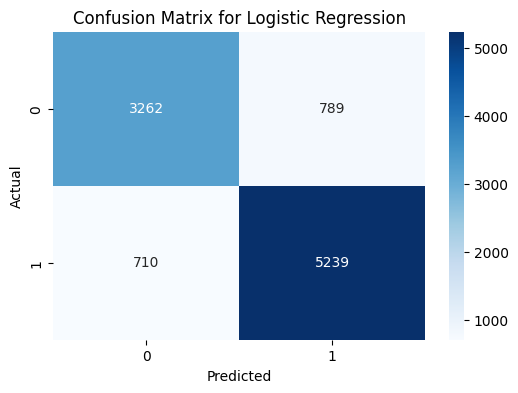

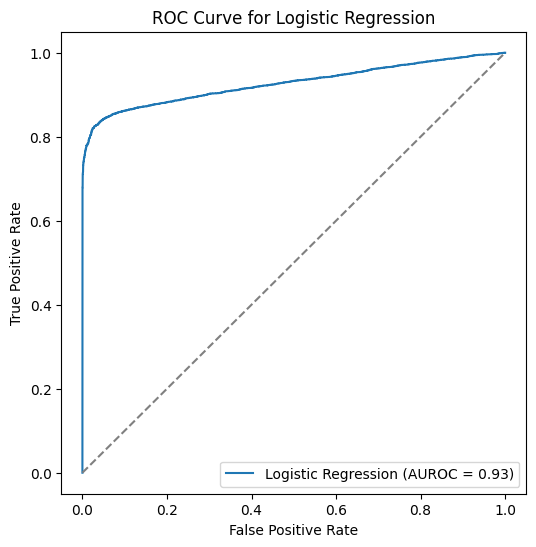

--- KNN ---
Test accuracy: 0.7394
Precision: 0.7391198235958862
Recall: 0.7394
F1 Score: 0.7392540496383632
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.68      4051
           1       0.78      0.78      0.78      5949

    accuracy                           0.74     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.74      0.74      0.74     10000



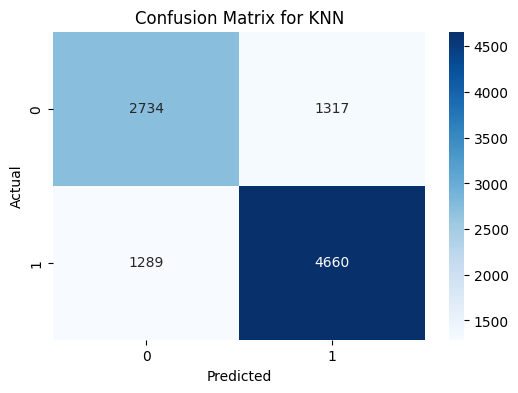

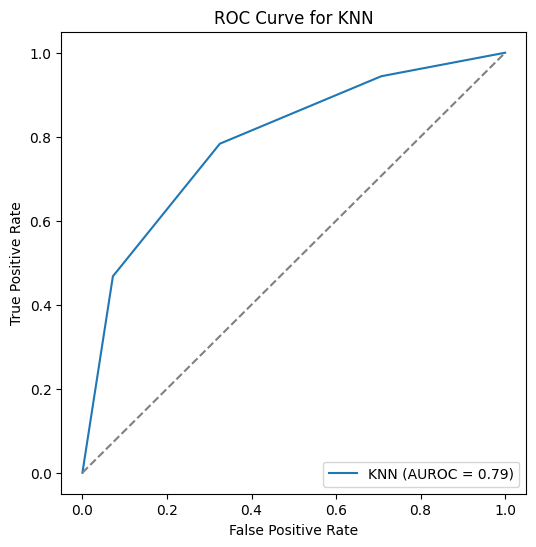

--- Random Forest ---
Test accuracy: 0.9064
Precision: 0.9221183290785897
Recall: 0.9064
F1 Score: 0.907247286877258
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      4051
           1       0.99      0.85      0.92      5949

    accuracy                           0.91     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.92      0.91      0.91     10000



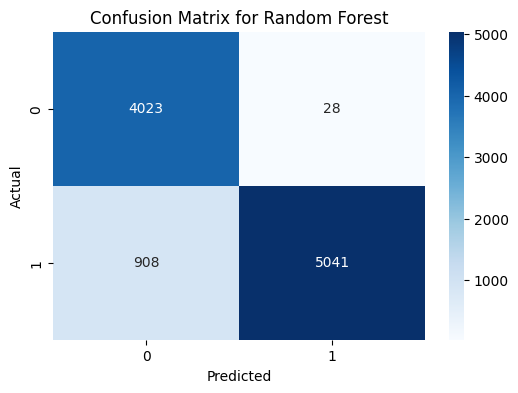

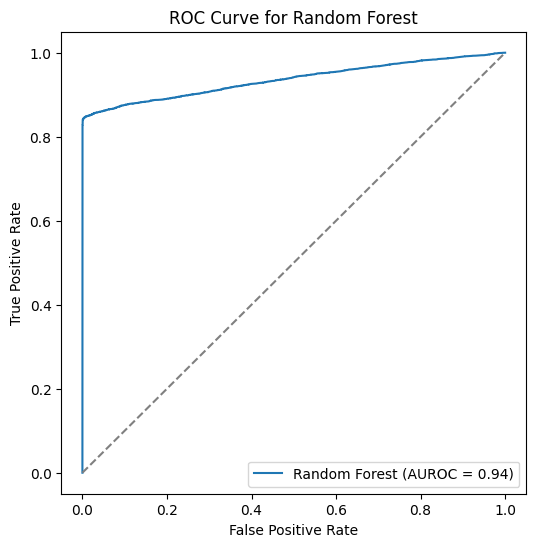

--- Perceptron ---
Test accuracy: 0.8125
Precision: 0.8119943557289881
Recall: 0.8125
F1 Score: 0.8121952454552392
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      4051
           1       0.84      0.85      0.84      5949

    accuracy                           0.81     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.81      0.81     10000



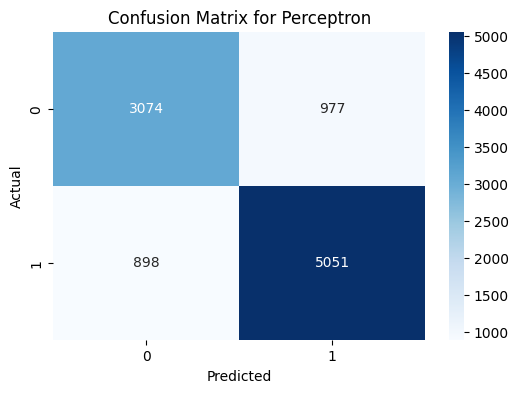

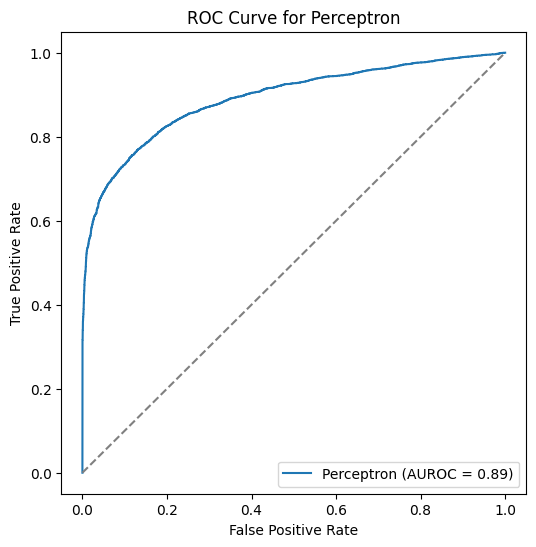

--- MLP ---
Test accuracy: 0.8638
Precision: 0.864671183621729
Recall: 0.8638
F1 Score: 0.8641047186257614
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      4051
           1       0.89      0.88      0.88      5949

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



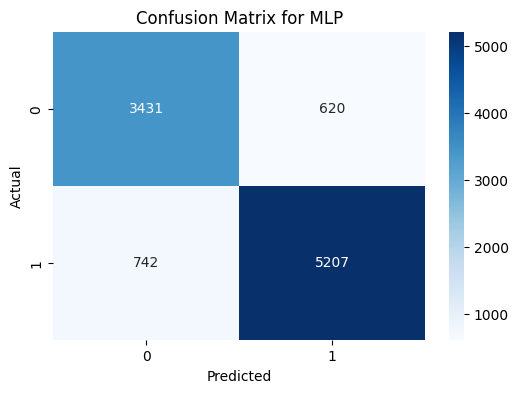

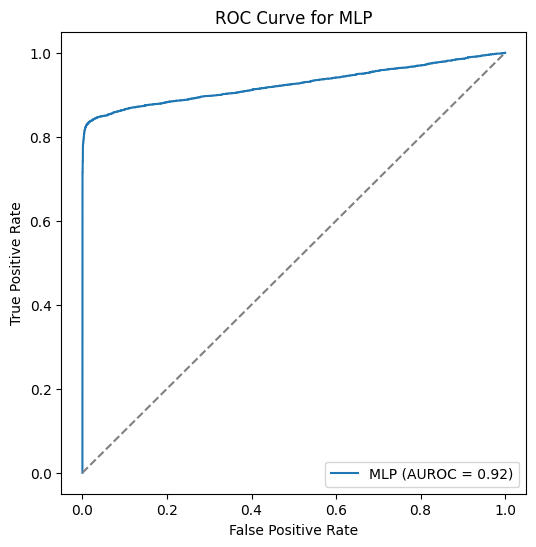

--- SVM ---
Test accuracy: 0.8484
Precision: 0.8478815586946675
Recall: 0.8484
F1 Score: 0.8480105039637365
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      4051
           1       0.87      0.88      0.87      5949

    accuracy                           0.85     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000



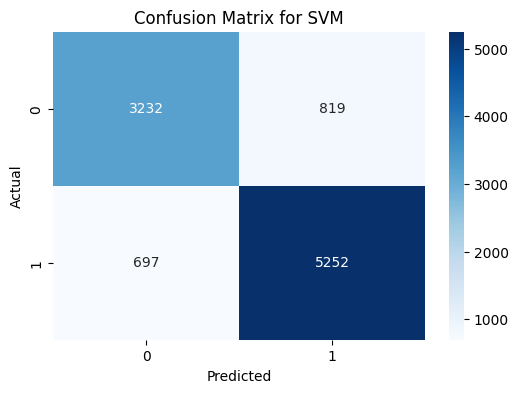

In [24]:
trained_models = {
    "Logistic Regression": logreg,
    "KNN": knn,
    "Random Forest": rf,
    "Perceptron": perceptron,
    "MLP": mlp,
    "SVM": svm
}

for name, model in trained_models.items():
    
    y_pred = model.predict(X_test_scaled)

  
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = None

    print(f"--- {name} ---")
    print("Test accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # ---- Confusion Matrix Plot ----
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f'{name} (AUROC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()